The provided code retrieves historical stock data for Adani using `yfinance`, preprocesses and normalizes the data, builds an LSTM model with two LSTM layers, and trains the model using the specified data split. It then makes predictions on the training, validation, and testing data, and visualizes the actual and predicted stock prices using `matplotlib.pyplot`.

Certainly! Here's a detailed explanation of the provided code:

1. **Data Collection**: The code starts by importing the necessary libraries and packages. It then uses the `yfinance` library to retrieve historical stock data for Adani from the specified start and end dates.

2. **Data Preprocessing**: The 'Close' prices from the retrieved stock data are extracted and stored in a dataframe called `df`. This dataframe contains the target variable for our prediction task.

3. **Data Normalization**: To ensure numerical stability and comparability across different features, the 'Close' prices are normalized using the `MinMaxScaler` from `sklearn.preprocessing`. The scaled data is stored in the `scaled_data` variable.

4. **Prepare the data for LSTM**: The code prepares the data for LSTM training by creating input sequences (`X`) and corresponding target values (`y`). It uses a sliding window approach, where each input sequence contains a window of previous 'Close' prices, and the corresponding target value is the next 'Close' price.

5. **Reshape the data**: The input sequences (`X`) are reshaped into a 3D array, as expected by the LSTM model, with dimensions `[samples, time steps, features]`. In this case, the input shape becomes `(number of samples, window size, 1)`.

6. **Split the data into training, validation, and testing sets**: The data is split into training, validation, and testing sets using the specified ratios. The training set comprises 70% of the data, the validation set comprises 15%, and the remaining 15% is used for testing.

7. **Build the LSTM model**: A sequential model is created using `Sequential` from `tensorflow.keras.models`. The model consists of two LSTM layers with 50 units each, followed by a dense output layer with 1 unit.

8. **Compile and train the model**: The model is compiled with the 'adam' optimizer and the mean squared error (MSE) loss function. It is then trained on the training data for a specified number of epochs and batch size. Additionally, the validation data is provided to monitor the model's performance during training.

9. **Make predictions**: The trained model is used to make predictions on the training, validation, and testing data.

10. **Inverse transform the predictions**: The predicted values are inverted back to their original scale using the `inverse_transform` method of the scaler. This step converts the normalized predictions into actual stock prices.
  1. In the provided code, the `inverse_transform` method is used to reverse the scaling transformation applied to the predicted stock prices before plotting and evaluation. 

  2. During the preprocessing step, the `MinMaxScaler` is applied to scale the original stock prices between the range of 0 and 1. This scaling is done to ensure that all input features are within a similar range and to improve the training performance of the LSTM model.

  3. After training and obtaining the predicted stock prices, the `inverse_transform` method is used to revert the scaled predictions back to their original scale. This is necessary to compare the predicted values with the actual stock prices, which are also in their original scale.

  4. By applying the inverse transformation, the predicted stock prices are converted back to their original range, allowing for a meaningful visual comparison and evaluation of the model's performance.

11. **Visualize the predictions**: The code uses `matplotlib.pyplot` to plot the actual and predicted values. The training and validation actual values are plotted in blue and orange, respectively. The testing actual values are plotted in green, while the predicted values for training, validation, and testing are plotted in red, purple, and yellow, respectively. The resulting graph provides a visual representation of the model's performance in predicting Adani's stock prices.

Overall, the code retrieves historical stock data, preprocesses and normalizes the data, builds and trains an LSTM model, makes predictions, and visualizes the actual and predicted stock prices.

In [13]:
#import necessary libraries
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Step 1: Data collection
# Retrieve historical data for Adani using yfinance
stock_data = yf.download('ADANIPORTS.NS', start='2010-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3209 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3209 non-null   float64
 1   High       3209 non-null   float64
 2   Low        3209 non-null   float64
 3   Close      3209 non-null   float64
 4   Adj Close  3209 non-null   float64
 5   Volume     3209 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.5 KB


In [4]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,111.000000,112.559998,110.699997,111.349998,103.490471,1079040
2010-01-05,111.959999,116.699997,111.800003,115.190002,107.059418,2112500
2010-01-06,115.800003,122.000000,113.070000,120.900002,112.366371,5761450
2010-01-07,121.489998,123.209999,119.000000,119.470001,111.037323,3174260
2010-01-08,119.400002,121.699997,118.639999,119.330002,110.907204,1220560


In [5]:
stock_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,798.000000,812.000000,785.299988,806.049988,806.049988,7205540
2022-12-27,810.099976,821.200012,798.099976,817.150024,817.150024,4872234
2022-12-28,815.750000,817.000000,808.799988,810.349976,810.349976,3624974
2022-12-29,807.000000,822.500000,799.549988,819.549988,819.549988,5308353
2022-12-30,822.450012,826.750000,815.599976,818.099976,818.099976,3252956


In [6]:
stock_data.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,False,False,False,False,False,False
2010-01-05,False,False,False,False,False,False
2010-01-06,False,False,False,False,False,False
2010-01-07,False,False,False,False,False,False
2010-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2022-12-26,False,False,False,False,False,False
2022-12-27,False,False,False,False,False,False
2022-12-28,False,False,False,False,False,False


In [8]:
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In the provided code snippet, the columns 'Open', 'High', 'Low', 'Close', 'Volume', and 'Adj Close' are chosen to create the correlation matrix. These columns are commonly used in financial analysis and provide information about various aspects of a stock's trading activity. 

- 'Open': The opening price of the stock for a given time period.
- 'High': The highest price reached by the stock during a given time period.
- 'Low': The lowest price reached by the stock during a given time period.
- 'Close': The closing price of the stock for a given time period.
- 'Volume': The number of shares traded during a given time period.
- 'Adj Close': The adjusted closing price of the stock, which takes into account factors such as dividends and stock splits.

Including these columns allows for a comprehensive analysis of the stock's behavior and its relationship with other variables. However, the choice of columns may vary depending on the specific analysis or requirements of the task at hand.

In [12]:
correlation_matrix = stock_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999619  0.999534  0.999187   0.999117  0.427324
High       0.999619  1.000000  0.999429  0.999661   0.999583  0.438358
Low        0.999534  0.999429  1.000000  0.999617   0.999542  0.419398
Close      0.999187  0.999661  0.999617  1.000000   0.999913  0.430592
Adj Close  0.999117  0.999583  0.999542  0.999913   1.000000  0.429373
Volume     0.427324  0.438358  0.419398  0.430592   0.429373  1.000000


In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()

In [15]:
# Step 2: Data preprocessing
# Extract the 'Close' prices
df = stock_data[['Close']]

In [16]:
# Step 3: Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [17]:
# Step 4: Prepare the data for LSTM
window_size = 60  # Number of previous days to use as input for prediction

In [18]:
X, y = [], []
for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [19]:
# Reshape the data for LSTM (input shape: [samples, time steps, features])
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [20]:
# Step 5: Split the data into training, validation, and testing sets
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))

X_train, X_val, X_test = X[:train_size], X[train_size:train_size + val_size], X[train_size + val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size + val_size], y[train_size + val_size:]

In [21]:
# Step 6: Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [22]:
# Step 7: Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
69/69 [==============================] - 15s 142ms/step - loss: 0.0026 - val_loss: 7.5758e-04
Epoch 2/10
69/69 [==============================] - 8s 121ms/step - loss: 2.3435e-04 - val_loss: 6.3678e-04
Epoch 3/10
69/69 [==============================] - 6s 87ms/step - loss: 2.2006e-04 - val_loss: 6.0718e-04
Epoch 4/10
69/69 [==============================] - 5s 75ms/step - loss: 2.0622e-04 - val_loss: 6.0255e-04
Epoch 5/10
69/69 [==============================] - 8s 116ms/step - loss: 1.8930e-04 - val_loss: 4.6929e-04
Epoch 6/10
69/69 [==============================] - 5s 68ms/step - loss: 1.7726e-04 - val_loss: 4.2835e-04
Epoch 7/10
69/69 [==============================] - 6s 86ms/step - loss: 1.7014e-04 - val_loss: 3.7197e-04
Epoch 8/10
69/69 [==============================] - 5s 67ms/step - loss: 1.6878e-04 - val_loss: 3.7177e-04
Epoch 9/10
69/69 [==============================] - 6s 83ms/step - loss: 1.5032e-04 - val_loss: 4.1073e-04
Epoch 10/10
69/69 [==================

In [23]:
# Step 8: Make predictions
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)
test_predictions = model.predict(X_test)

15/15 [==============================] - 0s 20ms/step


In [24]:
# Inverse transform the predictions to get the actual stock prices
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
val_predictions = scaler.inverse_transform(val_predictions)
y_val = scaler.inverse_transform([y_val])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

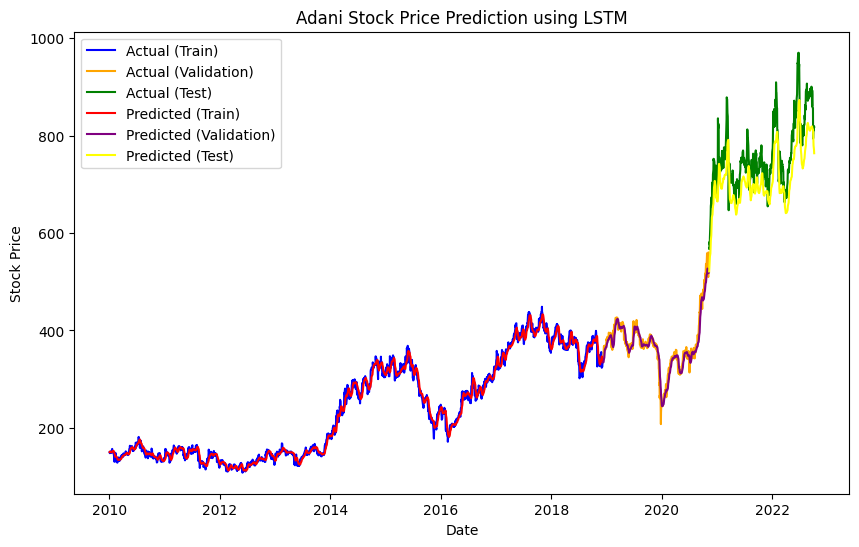

In [25]:
# Step 9: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[:train_size], y_train.flatten(), color='blue', label='Actual (Train)')
plt.plot(df.index[train_size:train_size + val_size], y_val.flatten(), color='orange', label='Actual (Validation)')
plt.plot(df.index[train_size + val_size:train_size + val_size + len(y_test.flatten())], y_test.flatten(), color='green', label='Actual (Test)')
plt.plot(df.index[:train_size], train_predictions.flatten(), color='red', label='Predicted (Train)')
plt.plot(df.index[train_size:train_size + val_size], val_predictions.flatten(), color='purple', label='Predicted (Validation)')
plt.plot(df.index[train_size + val_size:train_size + val_size + len(test_predictions)], test_predictions.flatten(), color='yellow', label='Predicted (Test)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Adani Stock Price Prediction using LSTM')
plt.legend()
plt.show()
